BerkeleyX: Data8.2x

Foundations of Data Science: Inferential Thinking by Resampling

In [64]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Lec 4.1 Probability & Sampling

In [5]:
# Sample two people without repetition from a population of 100 including Mo & Jo

# P(Mo & Jo are in the sample)
print(2*(1/100 * 1/99))
# P(neither Mo nor Jo in the sample)
print(98/100 * 97/99)


0.00020202020202020202
0.9602020202020203


Lec 4.2 Sampling

In [3]:
top = Table.read_table('../../data/top_movies_2017.csv')
top = top.with_column('Row Index', np.arange(top.num_rows)).move_to_start('Row Index')
top.set_format(['Gross', 'Gross (Adjusted)'], NumberFormatter)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
6,Jaws,Universal,"260,000,000","1,138,620,700",1975
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965
8,The Exorcist,Warner Brothers,"232,906,145","983,226,600",1973
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937


In [4]:
# deterministic sample
top.take([3, 5, 7])

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956
7,Doctor Zhivago,MGM,"111,721,910","1,103,564,200",1965


In [5]:
# another deterministic sample based on data content
top.where('Title', are.containing('and the'))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
9,Snow White and the Seven Dwarves,Disney,"184,925,486","969,010,000",1937
35,Butch Cassidy and the Sundance Kid,Fox,"102,308,889","627,259,300",1969
70,Smokey and the Bandit,Universal,"126,737,428","505,244,700",1977
71,Beauty and the Beast (2017),Buena Vista,"504,014,165","504,014,165",2017
74,Harry Potter and the Sorcerer's Stone,Warner Brothers,"317,575,550","497,066,400",2001
75,Lady and the Tramp,Disney,"93,602,326","495,483,100",1955
91,Indiana Jones and the Temple of Doom,Paramount,"179,870,271","475,906,700",1984
105,Indiana Jones and the Last Crusade,Paramount,"197,171,806","439,312,600",1989
114,Harry Potter and the Deathly Hallows Part 2,Warner Brothers,"381,011,219","426,630,300",2011
129,Beauty and the Beast,Buena Vista,"218,967,620","403,283,400",1991


In [30]:
# probability sample
#  not uniform, just a few film could be selected, and only the first one is randomly chosen
start = np.random.choice(range(10))
top.take(range(start, start + 5))

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
1,Star Wars,Fox,"460,998,007","1,583,483,200",1977
2,The Sound of Music,Fox,"158,671,368","1,266,072,700",1965
3,E.T.: The Extra-Terrestrial,Universal,"435,110,554","1,261,085,000",1982
4,Titanic,Paramount,"658,672,302","1,204,368,000",1997
5,The Ten Commandments,Paramount,"65,500,000","1,164,590,000",1956


In [53]:
# uniform random sample with repetition
top.sample(5)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
0,Gone with the Wind,MGM,"198,676,459","1,796,176,700",1939
167,GUnited Artistsrdians of the Galaxy,Buena Vista,"333,176,600","366,068,600",2014
160,Alice in Wonderland (2010),Buena Vista,"334,191,110","373,705,500",2010
34,Shrek 2,Dreamworks,"441,226,247","631,642,700",2004
150,Kramer Vs. Kramer,Columbia,"106,260,000","382,450,000",1979


In [60]:
# the default sampling is _with_ repetition
len(top.sample(100).group('Title').rows)

76

In [56]:
# uniform random sample without repetition
top.sample(5, with_replacement=False)

Row Index,Title,Studio,Gross,Gross (Adjusted),Year
132,Pirates of the Caribbean: At World's End,Buena Vista,"309,420,425","399,818,000",2007
139,Indiana Jones and the Kingdom of the Crystal Skull,Paramount,"317,101,119","392,622,400",2008
137,Transformers: Dark of the Moon,Paramount/Dreamworks,"352,390,543","393,479,300",2011
80,The Best Years of Our Lives,RKO,"23,650,000","488,950,000",1946
181,Apollo 13,Universal,"173,837,933","354,335,300",1995


In [59]:
# ensure sampling is now without repetition
len(top.sample(100, with_replacement=False).group('Title').rows)

100

Be careful not getting _samples of convenience_ - they are not random

Lec 4.3 Distributions

In [61]:
# table w/ outcomes throwing a die
die = Table().with_column('face', range(7))
die

face
0
1
2
3
4
5
6


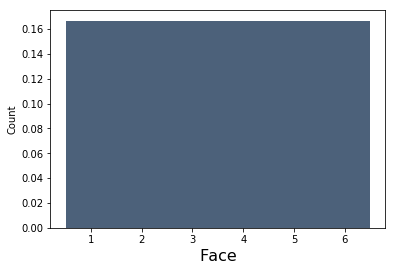

In [84]:
# explicitly remove the 'normed' param, using 'density' instead
def face_hist(t):
    t.hist('face', bins=np.arange(0.5, 7, 1), unit='face', normed=None, density=True)
    plt.xlabel('Face')

face_hist(die)

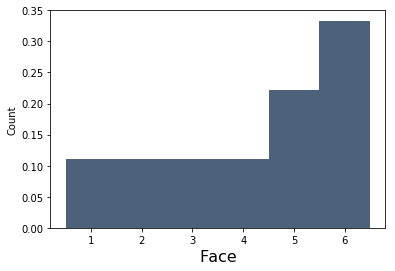

In [71]:
# empirical histogram, based on sampling
face_hist(die.sample(10))

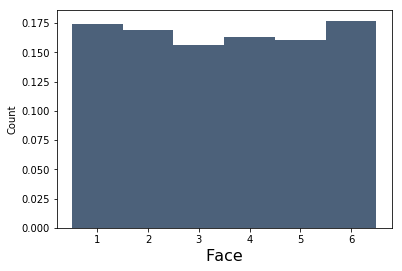

In [77]:
# as the number of samples grows, the distribution gets closer to the probability histogram
face_hist(die.sample(10000))

Lec 4.4 Large Random Samples

If the sample size is large, the empirical distribution of a uniform random sample
resamble the distribution of the population with high probability

In [79]:
# delay for United flights in a year
united = Table.read_table('../../data/united.csv')
united

Date,Flight Number,Destination,Delay
6/1/15,73,HNL,257
6/1/15,217,EWR,28
6/1/15,237,STL,-3
6/1/15,250,SAN,0
6/1/15,267,PHL,64
6/1/15,273,SEA,-6
6/1/15,278,SEA,-8
6/1/15,292,EWR,12
6/1/15,300,HNL,20
6/1/15,317,IND,-10


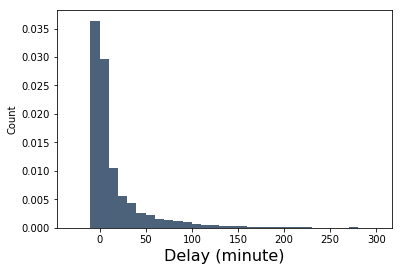

In [86]:
# actual population distribution
def delay_hist(t):
    t.hist('Delay', unit='minute', bins=range(-30, 301, 10), normed=None, density=True)
    
delay_hist(united)

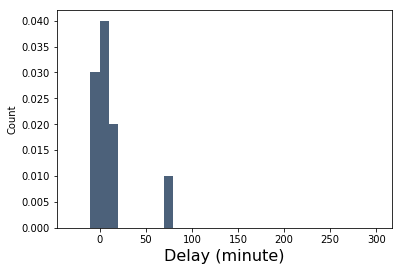

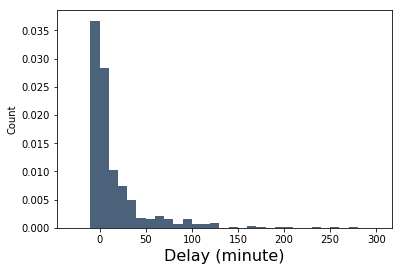

In [93]:
# sample distribution varies with size, tending to actual distribution
delay_hist(united.sample(10))
delay_hist(united.sample(1000))

Lec 4.5 Simulation

In [94]:
# Roll a fair die 4 times, chance of getting at least one six?

# by calculation:
k = 4
no_sixes = (5/6) ** 4
1 - no_sixes

0.5177469135802468

In [137]:
# a single simulation
dice = np.arange(1, 7)
rolls = np.random.choice(dice, k)
sum(rolls == 6)

1

In [143]:
# let's set up an experiment
trials = 1000
successes = 0

for _ in np.arange(trials):
    rolls = np.random.choice(dice, k)
    if sum(rolls == 6) > 0:
        successes = successes + 1
        
successes / trials

0.512

Lec 4.6 Statistics

In [149]:
# empirical distribution of a statistic

def estimate_by_simulation(trials):
    successes = 0

    for _ in range(trials):
        rolls = np.random.choice(dice, k)
        if sum(rolls == 6) > 0:
            successes = successes + 1

    return successes / trials

estimates = []
for _ in range(1000):
    estimates.append(estimate_by_simulation(1000))

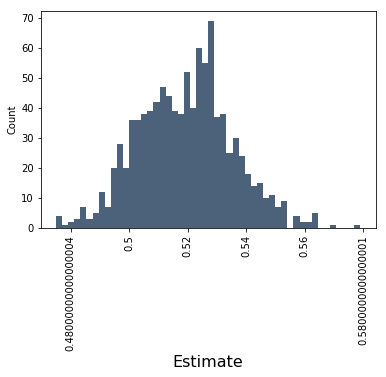

In [150]:
Table().with_column('Estimate', estimates).hist(bins=50, normed=None, density=False)